                 UserId   ProductId  Rating   Timestamp
0        A39HTATAQ9V7YF  0205616461     5.0  1369699200
1        A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2        A1Z513UWSAAO0F  0558925278     5.0  1404691200
3        A1WMRR494NWEWV  0733001998     4.0  1382572800
4        A3IAAVS479H7M7  0737104473     1.0  1274227200
...                 ...         ...     ...         ...
1518374   AIY221E509AVL  B006OMHUZQ     5.0  1341792000
1518375  A302OPND1XAKWH  B006OMHUZQ     4.0  1358812800
1518376  A3GFS8ZNAXWVGO  B006OMHUZQ     5.0  1367971200
1518377   A14YSE5M940GS  B006OMHUZQ     5.0  1361836800
1518378  A1ICKAWVLDNURL  B006OMHUZQ     4.0       13572

[1518379 rows x 4 columns]
Empty DataFrame
Columns: [ProductId, Rating]
Index: []
                 UserId   ProductId  Rating   Timestamp         day
0        A39HTATAQ9V7YF  0205616461     5.0  1369699200  1970-01-01
1        A3JM6GV9MNOF9X  0558925278     3.0  1355443200  1970-01-01
2        A1Z513UWSAAO0F  0558925278     5

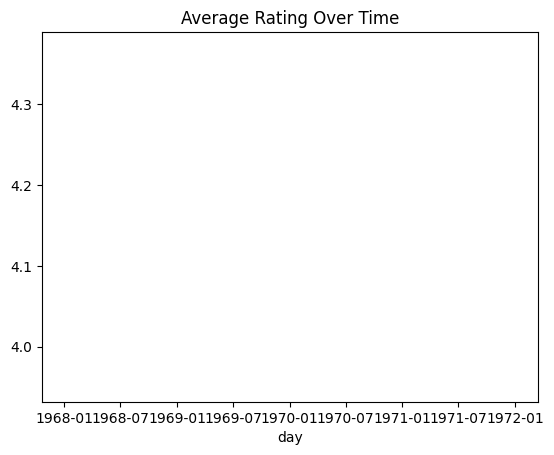

KeyboardInterrupt: ignored

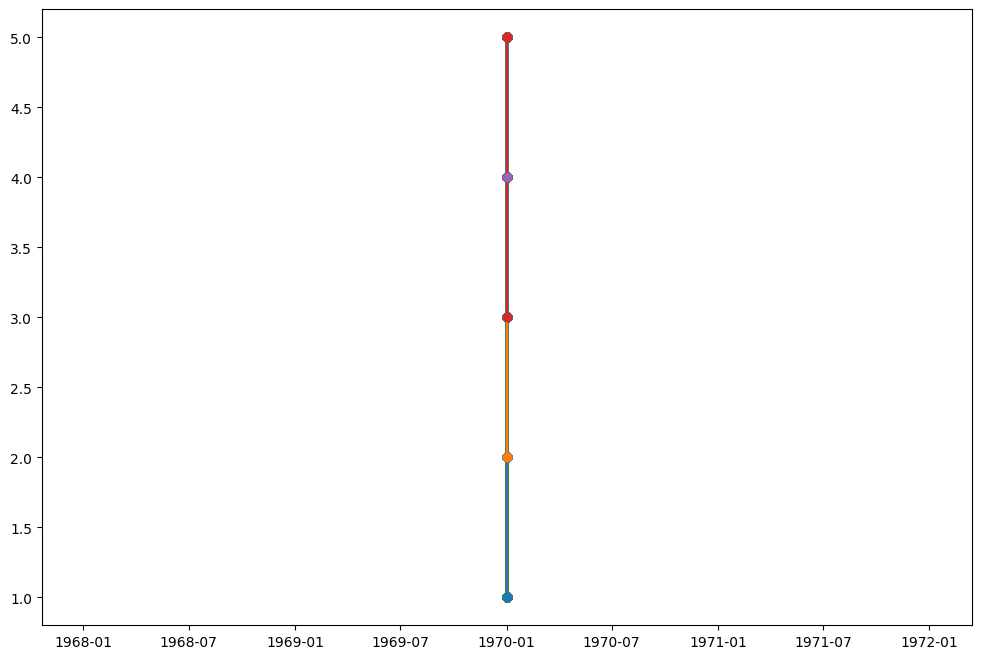

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'timestamp', 'product', 'sold', and 'rating'
# Replace these with your actual column names

# Load the data
df = pd.read_csv('/content/sample_data/ratings_Beauty.csv')
print(df)
## Filter rows to pick up the 10 highest sold products
# Group the data by the `ProductId` column and count the number of rows in each group
sold_count = df.groupby('ProductId')['Rating'].transform('count')

# Sort the `sold_count` series in descending order
sorted_sold_count = sold_count.sort_values(ascending=False)

# Select the first 10 rows of the sorted `sold_count` series
top_10_product_ids = sorted_sold_count.head(10)

# Join the `top_10_product_ids` series with the original data set to get the top 10 highest sold products
top_10_products = df[df['ProductId'].isin(top_10_product_ids)]

# Print the top 10 highest sold products
print("the top 10 highest sold products\n")
print(top_10_products[['ProductId', 'Rating']])

#
## Transform the data so we have days instead of timestamps
df["day"] = pd.to_datetime(df['Timestamp']).dt.date
print(df)
#
## Draw a line graph representing the averaging rating of the products
avg_rating = df.groupby('day')['Rating'].mean()
avg_rating.plot(kind='line', title='Average Rating Over Time')
plt.show()
#
## Draw a multi-line graph representing the selling number of each product by day
# Assume Rating represents the quantity sold
# You can adjust this based on your actual data
df['Sold'] = df['Rating']

# Plot multi-line graph
plt.figure(figsize=(12, 8))

# Iterate through each unique product ID
for product_id in df['ProductId'].unique():
    product_data = df[df['ProductId'] == product_id]
    plt.plot(product_data['day'], product_data['Sold'], label=f'Product {product_id}', marker='o', linestyle='-')

plt.title('Selling Number of Each Product by Day')
plt.xlabel('Day')
plt.ylabel('Sold')
plt.legend(title='Product ID')
plt.show()
#
## Draw a bar graph representing the number of occurrences of each rating value
rating_counts = df_top_products['Rating'].value_counts().sort_index()
rating_counts.plot(kind='bar', title='Rating Distribution')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data
start_date = "2023-01-01"
end_date = "2023-12-31"
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

temperature_mean = 25  # Mean temperature
temperature_std = 5    # Standard deviation of temperature

# Generate random temperature values
temperature_values = np.random.normal(loc=temperature_mean, scale=temperature_std, size=len(date_range))

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Temperature': temperature_values})

# Print the generated DataFrame
print(df)


          Date  Temperature
0   2023-01-01    27.483571
1   2023-01-02    24.308678
2   2023-01-03    28.238443
3   2023-01-04    32.615149
4   2023-01-05    23.829233
..         ...          ...
360 2023-12-27    27.596733
361 2023-12-28    32.663695
362 2023-12-29    24.456199
363 2023-12-30    27.008559
364 2023-12-31    28.450720

[365 rows x 2 columns]


ValueError: ignored

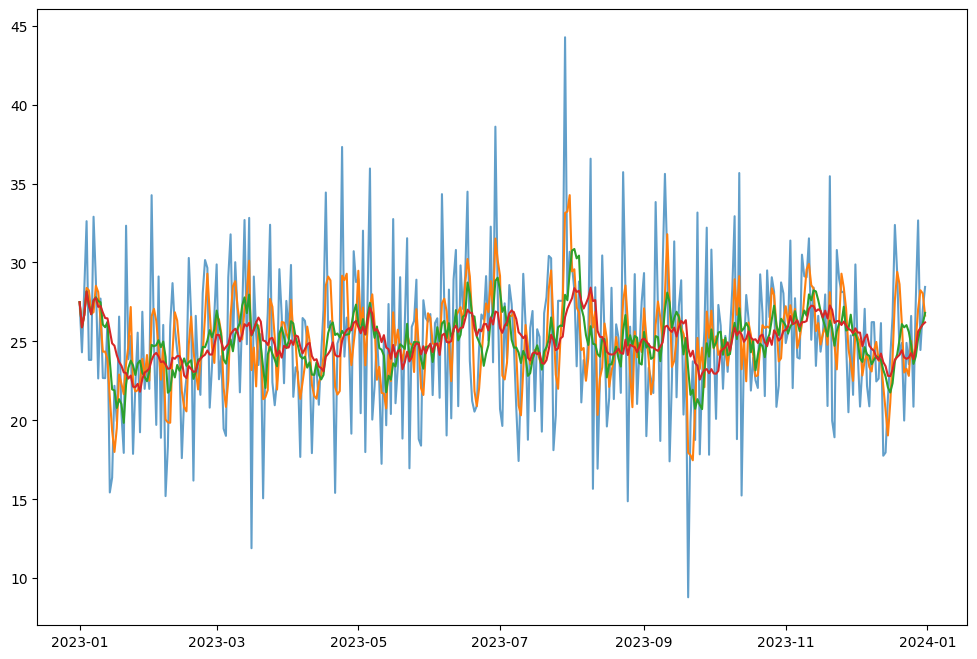

In [ ]:
# Implement moving average and weighted moving average
def moving_average(data, window_size):
    return data['Temperature'].rolling(window=window_size, min_periods=1).mean()

def weighted_moving_average(data, weights):
    return data['Temperature'].rolling(window=len(weights), min_periods=1).apply(lambda x: np.dot(x, weights[::-1]) / sum(weights), raw=True)

# Visualization of different window sizes and weights
window_sizes = [3, 7, 14]  # Example window sizes
weights_list = [[0.2, 0.3, 0.5], [0.1, 0.2, 0.3, 0.4], [0.25, 0.25, 0.25, 0.25]]  # Example weights for weighted moving average

plt.figure(figsize=(12, 8))

# Plot original data
plt.plot(df['Date'], df['Temperature'], label='Original Data', alpha=0.7)

# Plot moving averages
for window_size in window_sizes:
    plt.plot(df['Date'], moving_average(df, window_size), label=f'Moving Average (Window Size={window_size})')

# Plot weighted moving averages
for weights in weights_list:
    plt.plot(df['Date'], weighted_moving_average(df, weights), label=f'Weighted Moving Average (Weights={weights})')

plt.title('Effect of Different Smoothing Techniques')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Set the number of rows (n)
n = 5

# Create the identity matrix (In) of shape (n, n)
In = np.eye(n)

# Create the ones matrix (Jn) of shape (n, n)
Jn = np.ones((n, n))

# Calculate the centering matrix (Cn)
Cn = In - (1/n) * Jn

# Display the matrices
print("Identity Matrix (In):")
print(In)

print("\nOnes Matrix (Jn):")
print(Jn)

print("\nCentering Matrix (Cn):")
print(Cn)
M = np.array([[12, 3, 6], [17, 13, -2], [12, 13, 3], [6, 13.5, -2.5], [17, 21, 7]])
Mc = np.dot(Cn, M)
Mc
print("\n In_over_n (In_over_n):")
In_over_n = In / n
print(In_over_n)

print("\n Varm (Varm):")
Varm = np.dot(np.dot(Mc.T, In_over_n), Mc)

print(In_over_n)


Identity Matrix (In):
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Ones Matrix (Jn):
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Centering Matrix (Cn):
[[ 0.8 -0.2 -0.2 -0.2 -0.2]
 [-0.2  0.8 -0.2 -0.2 -0.2]
 [-0.2 -0.2  0.8 -0.2 -0.2]
 [-0.2 -0.2 -0.2  0.8 -0.2]
 [-0.2 -0.2 -0.2 -0.2  0.8]]

 In_over_n (In_over_n):
[[0.2 0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.2]]

 Varm (Varm):
[[0.2 0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.2]]


In [1]:
import cv2

# Load the pre-trained Haar Cascade face classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a connection to the camera (0 is usually the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the result
    cv2.imshow('Face Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
